In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from category_encoders import BinaryEncoder

# Load the dataset
file_path = "/content/drive/MyDrive/ML/cancer-patient-data-sets.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

(None,
    index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
 0      0         P1   33       1              2            4             5   
 1      1        P10   17       1              3            1             5   
 2      2       P100   35       1              4            5             6   
 3      3      P1000   37       1              7            7             7   
 4      4       P101   46       1              6            8             7   
 
    OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
 0                     4             3                     2  ...        3   
 1                     3             4                     2  ...        1   
 2                     5             5                     4  ...        8   
 3                     7             6                     7  ...        4   
 4                     7             7                     6  ...        3   
 
    Weight Loss  Shortness of Breath  Wheezing 

<ipython-input-80-26e681255016>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


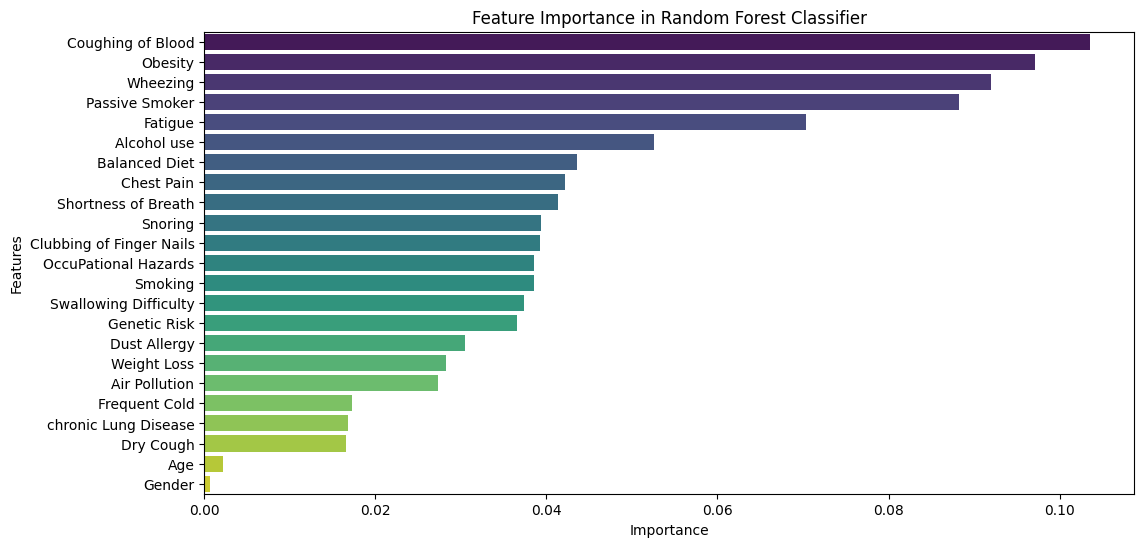

,Feature,Importance
13,Coughing of Blood,0.103534
9,Obesity,0.097075
17,Wheezing,0.092011
11,Passive Smoker,0.088218
14,Fatigue,0.070324
3,Alcohol use,0.052617
8,Balanced Diet,0.043547
12,Chest Pain,0.042204
16,Shortness of Breath,0.041308
22,Snoring,0.039398


In [80]:
df = df.drop(columns=['index', 'Patient Id'])
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])
#print(df['Level'])
X = df.drop(columns=['Level'])
y = df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

importance_df.head(10)


In [81]:
total_importance = importance_df['Importance'].sum()
total_importance

1.0

In [76]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'{dt_accuracy*100}%,              {rf_accuracy*100}%')


100.0%,              100.0%


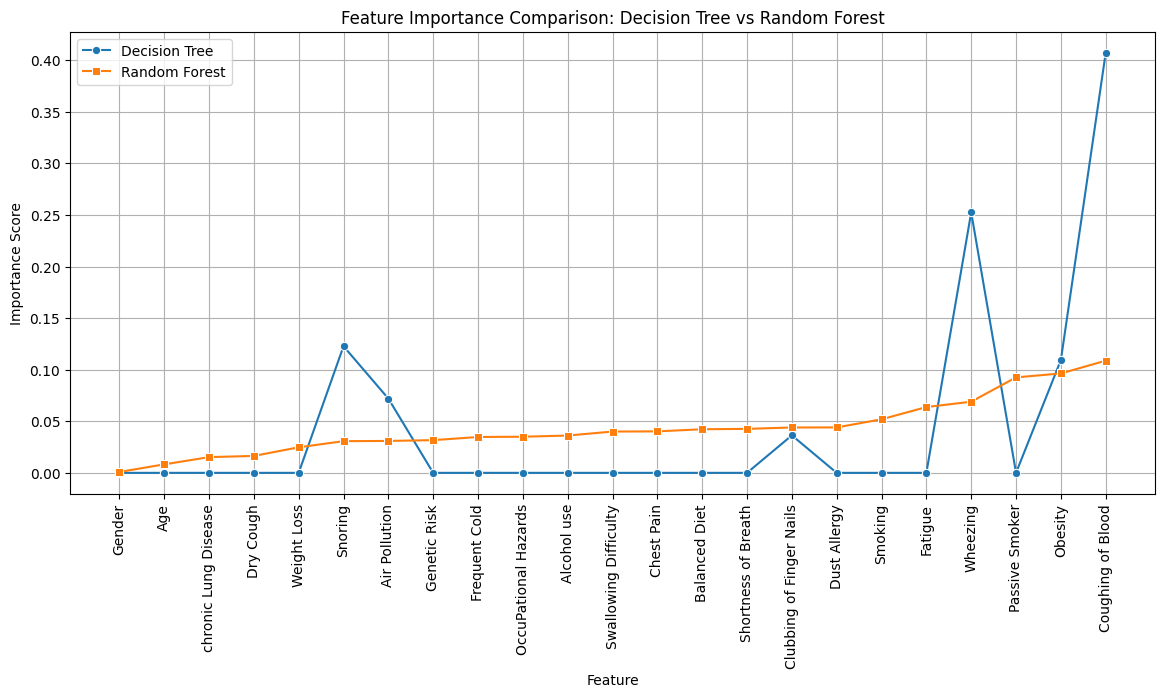

In [82]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': dt_importance,
    'Random Forest': rf_importance
}).sort_values(by='Random Forest')

# Plot feature importance comparison
plt.figure(figsize=(14, 6))
sns.lineplot(x=importance_df['Feature'], y=importance_df['Decision Tree'], marker='o', label="Decision Tree")
sns.lineplot(x=importance_df['Feature'], y=importance_df['Random Forest'], marker='s', label="Random Forest")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance Comparison: Decision Tree vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Accuracy:  1.0
Random Forest Accuracy:  1.0


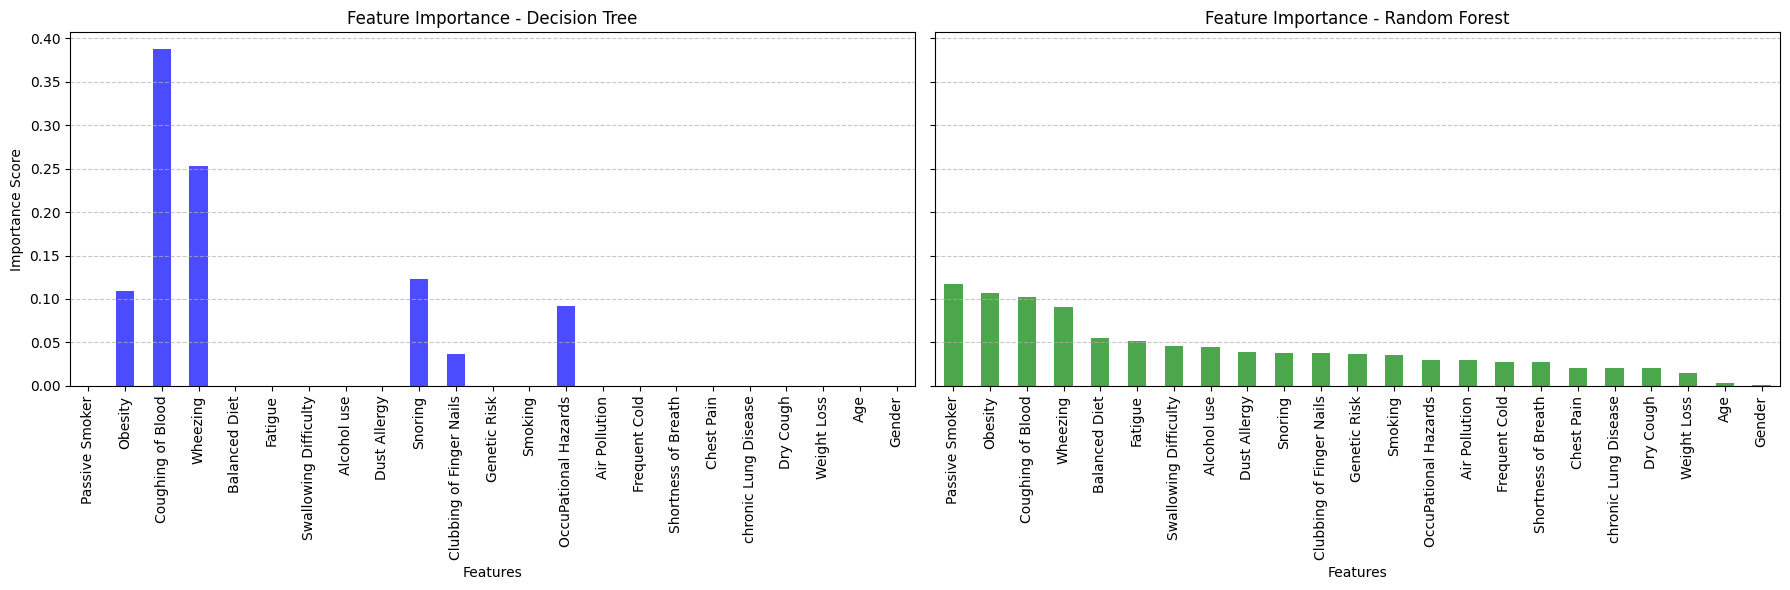

                          Decision Tree Importance  Random Forest Importance
Feature                                                                     
Passive Smoker                            0.000000                  0.117486
Obesity                                   0.109362                  0.107406
Coughing of Blood                         0.387493                  0.102779
Wheezing                                  0.252494                  0.091164
Balanced Diet                             0.000000                  0.055014
Fatigue                                   0.000000                  0.051853
Swallowing Difficulty                     0.000000                  0.045817
Alcohol use                               0.000000                  0.044720
Dust Allergy                              0.000000                  0.038832
Snoring                                   0.122720                  0.038187
Clubbing of Finger Nails                  0.036331                  0.037946

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
5,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
6,52,2,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
7,28,2,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,1
8,35,2,4,5,6,5,6,5,5,5,...,1,4,3,2,4,6,2,4,1,2
9,46,1,2,3,4,2,4,3,3,3,...,1,2,4,6,5,4,2,1,5,2


In [90]:
def custom_encode(column):
    mapping = {'Low': 0, 'Medium': 1, 'High': 1}
    return column.map(lambda x: mapping.get(x, x))

# Apply encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = custom_encode(data[col])

# Split features and target
x = df.drop(columns=['Level'])
y = df['Level']

# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Get feature importance
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_

# Model evaluation
y_pred_dt = dt_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Performance metrics
print("Decision Tree Accuracy: ", dt_accuracy)
print("Random Forest Accuracy: ", rf_accuracy)

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Decision Tree Importance': dt_importance,
    'Random Forest Importance': rf_importance
}).set_index('Feature')

# Sort by importance
feature_importance.sort_values(by='Random Forest Importance', ascending=False, inplace=True)

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Plot Decision Tree Importance
feature_importance['Decision Tree Importance'].plot(kind='bar', color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title("Feature Importance - Decision Tree")
axes[0].set_ylabel("Importance Score")
axes[0].set_xlabel("Features")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Random Forest Importance
feature_importance['Random Forest Importance'].plot(kind='bar', color='green', alpha=0.7, ax=axes[1])
axes[1].set_title("Feature Importance - Random Forest")
axes[1].set_ylabel("Importance Score")
axes[1].set_xlabel("Features")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Print feature importance DataFrame
print(feature_importance)
df.head(10)

In [ ]:
binary_encoder = BinaryEncoder(cols=['Level'])
df_encoded = binary_encoder.fit_transform(df)
df_encoded.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_0,Level_1
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,0,1
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,1,0
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,1,1
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,1,1
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,1,1


<ipython-input-56-37d6ba1a03e6>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


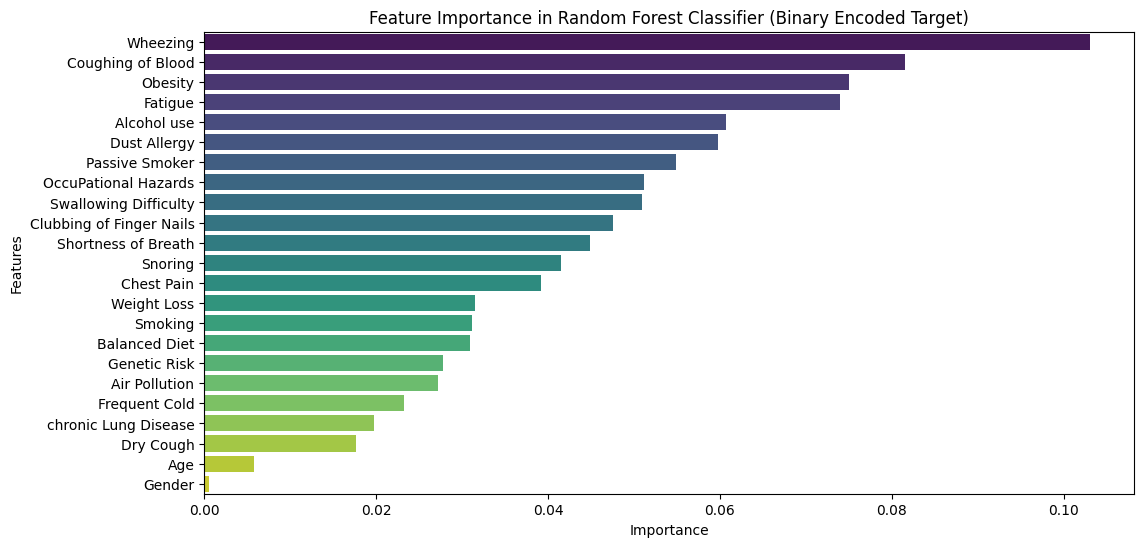

,Feature,Importance
17,Wheezing,0.103041
13,Coughing of Blood,0.081480
9,Obesity,0.075072
14,Fatigue,0.073954
3,Alcohol use,0.060689
4,Dust Allergy,0.059800
11,Passive Smoker,0.054913
5,OccuPational Hazards,0.051207
18,Swallowing Difficulty,0.050956
19,Clubbing of Finger Nails,0.047585


In [ ]:

# Apply Binary Encoding to 'Level' column
binary_encoder = BinaryEncoder(cols=['Level'])
df_encoded = binary_encoder.fit_transform(df)

# Split features and target
X = df_encoded.drop(columns=['Level_0', 'Level_1'])  # Removing encoded target columns from features
y = df_encoded[['Level_0', 'Level_1']]  # Binary encoded target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Classifier (Binary Encoded Target)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Display the most important features
importance_df.head(10)


In [ ]:
total_importance = importance_df['Importance'].sum()
total_importance

1.0000000000000002

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions.round())  # Rounding since binary encoding might give probabilities

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions.round())

# Print accuracy results
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%


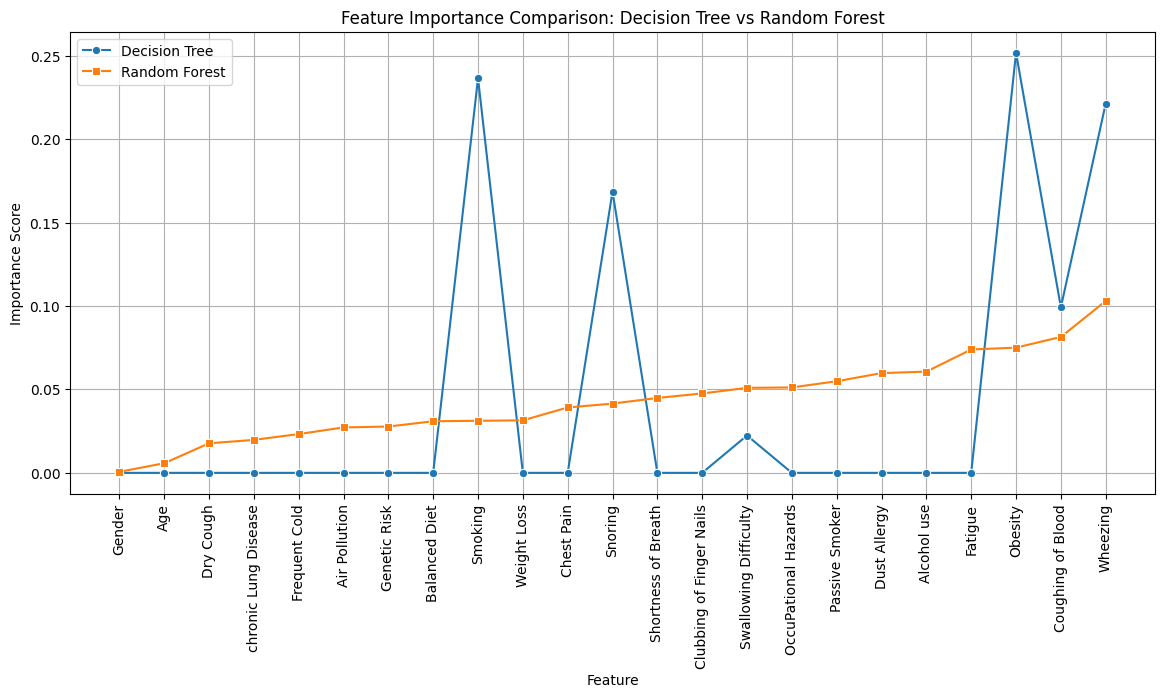

In [ ]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_importance = dt.feature_importances_

# Train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# Feature importance comparison
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Decision Tree': dt_importance,
    'Random Forest': rf_importance
}).sort_values(by='Random Forest')

# Plot feature importance comparison
plt.figure(figsize=(14, 6))
sns.lineplot(x=importance_df['Feature'], y=importance_df['Decision Tree'], marker='o', label="Decision Tree")
sns.lineplot(x=importance_df['Feature'], y=importance_df['Random Forest'], marker='s', label="Random Forest")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance Comparison: Decision Tree vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()


Decision Tree Accuracy:  1.0
Random Forest Accuracy:  1.0


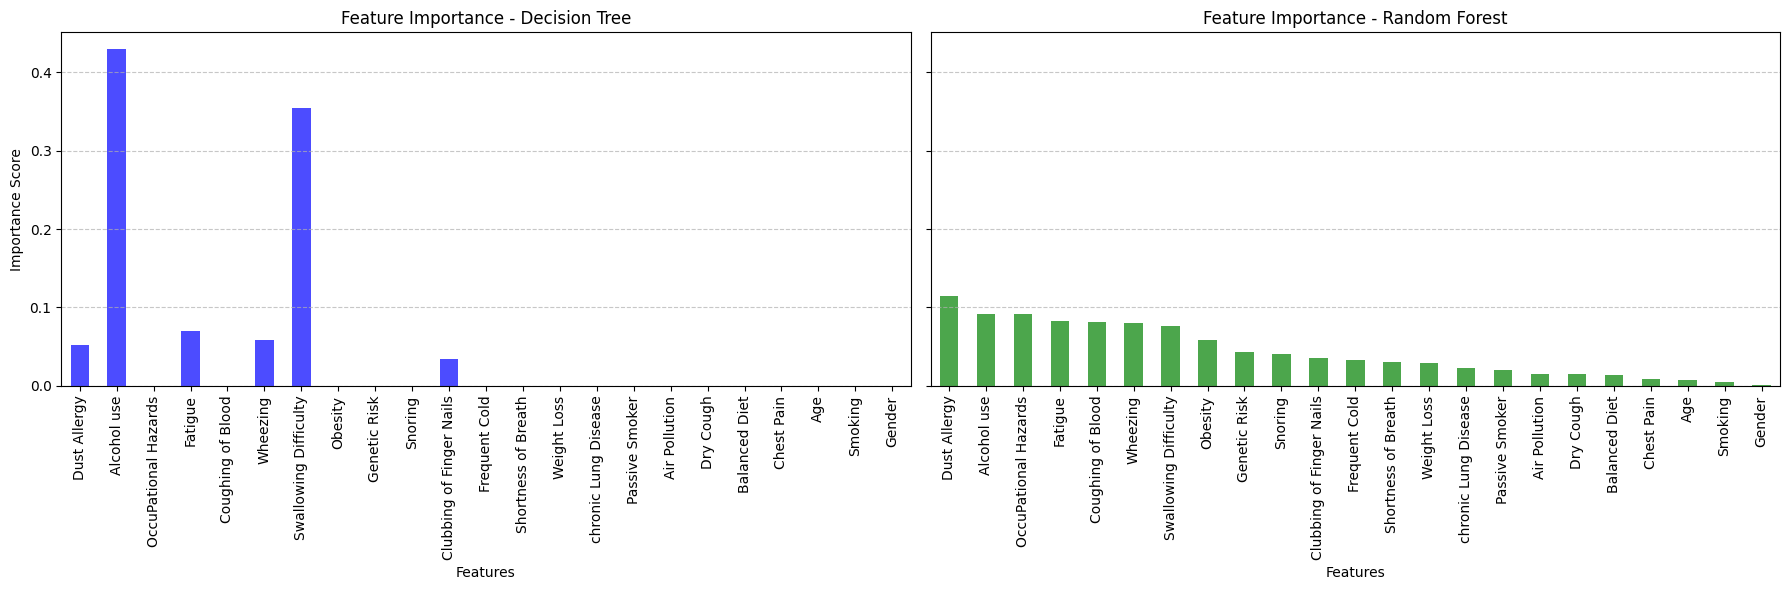

                          Decision Tree Importance  Random Forest Importance
Feature                                                                     
Dust Allergy                              0.052195                  0.114810
Alcohol use                               0.429702                  0.092152
OccuPational Hazards                      0.000000                  0.091639
Fatigue                                   0.070323                  0.082999
Coughing of Blood                         0.000000                  0.081182
Wheezing                                  0.058679                  0.080431
Swallowing Difficulty                     0.354555                  0.076534
Obesity                                   0.000000                  0.058274
Genetic Risk                              0.000000                  0.042866
Snoring                                   0.000000                  0.040776
Clubbing of Finger Nails                  0.034545                  0.035766

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1
5,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
6,52,2,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
7,28,2,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,0
8,35,2,4,5,6,5,6,5,5,5,...,1,4,3,2,4,6,2,4,1,1
9,46,1,2,3,4,2,4,3,3,3,...,1,2,4,6,5,4,2,1,5,1


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('/content/drive/MyDrive/ML/cancer-patient-data-sets.csv')
# Drop unnecessary columns (ignores if they don't exist)
data.drop(columns=['index', 'Patient Id'], inplace=True, errors='ignore')

# Define custom encoding function
def custom_encode(column):
    mapping = {'Low': 0, 'Medium': 1, 'High': 1}
    return column.map(lambda x: mapping.get(x, x))

# Apply encoding to categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = custom_encode(data[col])

# Split features and target
x = data.drop(columns=['Level'])
y = data['Level']

# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Get feature importance
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_

# Model evaluation
y_pred_dt = dt_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Performance metrics
print("Decision Tree Accuracy: ", dt_accuracy)
print("Random Forest Accuracy: ", rf_accuracy)

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Decision Tree Importance': dt_importance,
    'Random Forest Importance': rf_importance
}).set_index('Feature')

# Sort by importance
feature_importance.sort_values(by='Random Forest Importance', ascending=False, inplace=True)

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Plot Decision Tree Importance
feature_importance['Decision Tree Importance'].plot(kind='bar', color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title("Feature Importance - Decision Tree")
axes[0].set_ylabel("Importance Score")
axes[0].set_xlabel("Features")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Random Forest Importance
feature_importance['Random Forest Importance'].plot(kind='bar', color='green', alpha=0.7, ax=axes[1])
axes[1].set_title("Feature Importance - Random Forest")
axes[1].set_ylabel("Importance Score")
axes[1].set_xlabel("Features")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Print feature importance DataFrame
print(feature_importance)
data.head(10)